# Ch6. 순환 신경망 텍스트 감성 분석

아래 코딩문은 구글 코랩에서 실행 필요.
데이터셋을 불러오는 자세한 과정은 책 본문 가이드라인 참조

In [ ]:
|# 자료 출처: https://www.kaggle.com/datasciencetool/covid19-vaccine-tweets-with-sentiment-annotation
# negative 1, neutral 2, positive 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Data/covid-19_vaccine_tweets_with_sentiment.csv',
                 encoding='latin')
# encoding='latin'을 넣지 않으면 불러올 때 에러 발생
df.shape

(6000, 3)

In [ ]:
df.head()

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [ ]:
df = df.rename(columns={"tweet_text": "text"})

In [ ]:
df1 = df[["text","label"]]

In [ ]:
df1.head()

,text,label
0,"4,000 a day dying from the so called Covid-19 ...",1
1,Pranam message for today manifested in Dhyan b...,2
2,Hyderabad-based ?@BharatBiotech? has sought fu...,2
3,"Confirmation that Chinese #vaccines ""dont hav...",1
4,"Lab studies suggest #Pfizer, #Moderna vaccines...",3


In [ ]:
df1['label'].value_counts()

2    3680
3    1900
1     420
Name: label, dtype: int64

In [ ]:
df2 = df1.replace({1: 0, 2: 0})

In [ ]:
df2.replace({3: 1}, inplace=True)

In [ ]:
df2['label'].value_counts()

0    4100
1    1900
Name: label, dtype: int64

In [ ]:
df2.head()

,text,label
0,"4,000 a day dying from the so called Covid-19 ...",0
1,Pranam message for today manifested in Dhyan b...,0
2,Hyderabad-based ?@BharatBiotech? has sought fu...,0
3,"Confirmation that Chinese #vaccines ""dont hav...",0
4,"Lab studies suggest #Pfizer, #Moderna vaccines...",1


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df2, test_size=0.25, random_state=0, shuffle=True)

In [ ]:
train_df.shape

(4500, 2)

In [ ]:
test_df.shape

(1500, 2)

In [ ]:
type(train_df)

pandas.core.frame.DataFrame

In [ ]:
# 참조 코딩
train_df.head(3)

,text,label
1824,"With his intellectual capacity &amp; vision, I...",0
253,@BDUTT @drriteshmalik What a waste of #Covaxin ?,0
1114,@MoHFW_INDIA @drharshvardhan @PMOIndia @Ashwin...,0


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(train_df['text'].values, tf.string),
            tf.cast(train_df['label'].values, tf.int64)
        )
    )
)

for features_tensor, target_tensor in train_dataset.take(1):
    print(f'text:{features_tensor}')
    print()
    print(f'label:{target_tensor}')
    print()

text:b'With his intellectual capacity &amp; vision, I bet if Taksin were still the PM, #Thailand wouldn\xc2\x92t be in such a bad shape right now. Too bad Thai people have stupid &amp; selfish politicians in the government now. #????? #?????19 #Sinovac #?????? #??????????? https://t.co/Dth4bUVCB8'

label:0



In [ ]:
test_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(test_df['text'].values, tf.string),
            tf.cast(test_df['label'].values, tf.int64)
        )
    )
)

for features_tensor, target_tensor in test_dataset.take(1):
    print(f'text:{features_tensor}')
    print()
    print(f'label:{target_tensor}')
    print()

text:b'All done and dusted! #grateful #PfizerBioNTech #bothdoses #COVID19Vaccine Thanks you @Mercycork and the vaccination team ?????? #EDnurse https://t.co/QtIyPG5kfx'

label:1



In [ ]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [ ]:
# 참조 코딩
print(train_dataset)

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>


In [ ]:
# 참조 코딩
for text, label in train_dataset.take(2):
  print('text: ', text.numpy())
  print()
  print('label: ', label.numpy())
  print()

text:  b'With his intellectual capacity &amp; vision, I bet if Taksin were still the PM, #Thailand wouldn\xc2\x92t be in such a bad shape right now. Too bad Thai people have stupid &amp; selfish politicians in the government now. #????? #?????19 #Sinovac #?????? #??????????? https://t.co/Dth4bUVCB8'

label:  0

text:  b'@BDUTT @drriteshmalik What a waste of #Covaxin ?'

label:  0



In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 30  

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
# 참조 코딩
print(train_dataset)

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>


In [ ]:
for text, label in train_dataset.take(1):
  print('text: ', text.numpy())
  print()
  print('label: ', label.numpy())
  print()

text:  [b'COVID-19 vaccination: Telangana, Andhra Pradesh and Uttar Pradesh wasting most vaccines\n\n@MoHFW_INDIA @PMOIndia #UttarPradesh #AndhraPradesh #COVID19India #COVID19 #Covid_19 #COVAXIN #COVID19Vaccination \n\nhttps://t.co/mQ2wdqBOd2'
 b'12.6 million and one. #moderna #GetVaccinated https://t.co/75ptg5UNGA https://t.co/73rGwMNhCQ'
 b'PM #NarendraModi today killed two birds with one jab: tackled vaccine hesitancy, and assured India of the safety of #Covaxin. Also, the politics in #Bengal over the swollen face of Shova Majumdar. On #DailyOh today. | @vsinghhere \n\nhttps://t.co/URYuK80WXz'
 b'@MihirkJha #SastaBhiKargarBhi #Covaxin of Bharat Biotech'
 b"#Centre has approved #Russia\xc2\x92s Sputnik-V #Covid #vaccine for emergency use in #India, third to #Covishield &amp; #Covaxin. Drugs Controller General of India (#DCGI)'s Subject Expert Committee decided to give authorisation. https://t.co/5EqTq58BFb"
 b'Just found out that I DID receive the active #PfizerBioNTech vaccine as pa

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = VOCAB_SIZE
)

encoder.adapt(train_dataset.map(lambda text, label: text)) 

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'of', 'vaccine', 'and', 'moderna', 'in',
       'covid19', 'is', 'a', 'for', 'covaxin', 'i', 'sputnikv', 'my',
       'on', 'it', 'with'], dtype='<U19')

In [ ]:
encoded_example = encoder(text)[:2].numpy()
encoded_example

array([[  9,  47,   1,   1,   1,   6,   1,   1,   1, 285,  25, 258, 331,
          1,   1, 352,   9,   9,  13, 193,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  1, 103,   6,  75,   7, 212,   1,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]])

In [ ]:
# 참조 코딩
for n in range(2):
    print(n + 1)
    print("Original: ", text[n].numpy())
    print()
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

1
Original:  b'COVID-19 vaccination: Telangana, Andhra Pradesh and Uttar Pradesh wasting most vaccines\n\n@MoHFW_INDIA @PMOIndia #UttarPradesh #AndhraPradesh #COVID19India #COVID19 #Covid_19 #COVAXIN #COVID19Vaccination \n\nhttps://t.co/mQ2wdqBOd2'

Round-trip:  covid19 vaccination [UNK] [UNK] [UNK] and [UNK] [UNK] [UNK] most vaccines mohfwindia pmoindia [UNK] [UNK] covid19india covid19 covid19 covaxin covid19vaccination [UNK]                        

2
Original:  b'12.6 million and one. #moderna #GetVaccinated https://t.co/75ptg5UNGA https://t.co/73rGwMNhCQ'

Round-trip:  [UNK] million and one moderna getvaccinated [UNK] [UNK]                                     



In [ ]:
# SimpleRNN 모델 구축
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim = len(vocab),
        output_dim = 64,
        mask_zero = True
    ),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') 
])

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [ ]:
# SimpleRNN 모델 학습
# 텐서플로 케라스 신경망 모델은 매번 실행시 모델 결과가 조금씩 다를 수 있음에 유의

from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('RNNClassifier.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',\
                                                  restore_best_weights=True)

history = model.fit(train_dataset, epochs = 20,
                    validation_data = test_dataset,
                    validation_steps = 30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/20
150/150 [==============================] - 6s 29ms/step - loss: 0.6233 - accuracy: 0.6778 - val_loss: 0.6070 - val_accuracy: 0.6844
INFO:tensorflow:Assets written to: RNNClassifier.tf/assets
Epoch 2/20
150/150 [==============================] - 4s 26ms/step - loss: 0.5664 - accuracy: 0.7222 - val_loss: 0.5674 - val_accuracy: 0.7233
INFO:tensorflow:Assets written to: RNNClassifier.tf/assets
Epoch 3/20
150/150 [==============================] - 4s 27ms/step - loss: 0.5227 - accuracy: 0.7613 - val_loss: 0.5306 - val_accuracy: 0.7511
INFO:tensorflow:Assets written to: RNNClassifier.tf/assets
Epoch 4/20
150/150 [==============================] - 4s 26ms/step - loss: 0.4904 - accuracy: 0.7822 - val_loss: 0.5193 - val_accuracy: 0.7633
INFO:tensorflow:Assets written to: RNNClassifier.tf/assets
Epoch 5/20
150/150 [==============================] - 4s 27ms/step - loss: 0.4562 - accuracy: 0.8020 - val_loss: 0.4929 - val_accuracy: 0.7756
INFO:tensorflow:Assets written to: RNNClassifier.

In [ ]:
# 참조 코딩
len(history.history['val_accuracy'])

10

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(epochs, history.history[metric])
    plt.plot(epochs, history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

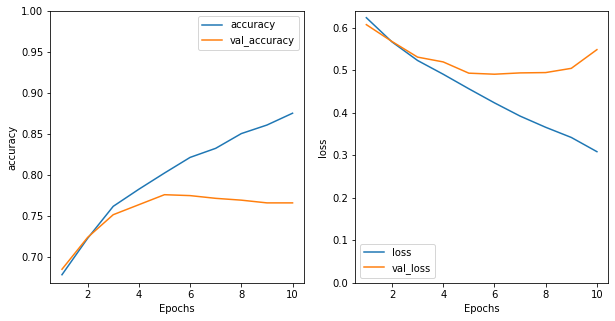

In [ ]:
# epochs가 10회가 아닌 다른 결과(예:7회)로 나오면 아래 줄 10를 해당 숫자인 7로 바꿔주야 함에 유의
epochs = range(1,10+1) # epochs가 10까지만 수행된 것을 반영

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수 불러오기
model.load_weights('RNNClassifier.tf')

In [ ]:
# SimpleRNN 모델을 평가
test_loss, test_acc = model.evaluate(test_dataset)

print("test loss: ", test_loss)
print()
print("test accuracy: ", test_acc)

50/50 [==============================] - 0s 8ms/step - loss: 0.4910 - accuracy: 0.7740
test loss:  0.4909991919994354

test accuracy:  0.7739999890327454


In [ ]:
# LSTM RNN 모델 구축
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim = len(vocab),
        output_dim = 64,
        mask_zero = True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') 
])

In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [ ]:
# LSTM RNN 모델 학습
# 텐서플로 케라스 신경망 모델은 매번 실행시 모델 결과가 조금씩 다를 수 있음에 유의

from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('RNNClassifier.tf', save_weights_only=True) #save_weights_only 옵션으로 변경합니다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',\
                                                  restore_best_weights=True)

history = model.fit(train_dataset, epochs = 20,
                    validation_data = test_dataset,
                    validation_steps = 30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/20
150/150 [==============================] - 23s 100ms/step - loss: 0.6450 - accuracy: 0.6762 - val_loss: 0.6055 - val_accuracy: 0.6711
Epoch 2/20
150/150 [==============================] - 12s 82ms/step - loss: 0.5823 - accuracy: 0.6851 - val_loss: 0.5783 - val_accuracy: 0.6800
Epoch 3/20
150/150 [==============================] - 12s 81ms/step - loss: 0.5445 - accuracy: 0.7258 - val_loss: 0.5408 - val_accuracy: 0.7433
Epoch 4/20
150/150 [==============================] - 12s 81ms/step - loss: 0.4971 - accuracy: 0.7736 - val_loss: 0.4985 - val_accuracy: 0.7611
Epoch 5/20
150/150 [==============================] - 12s 81ms/step - loss: 0.4473 - accuracy: 0.7984 - val_loss: 0.4853 - val_accuracy: 0.7689
Epoch 6/20
150/150 [==============================] - 12s 80ms/step - loss: 0.4182 - accuracy: 0.8140 - val_loss: 0.4599 - val_accuracy: 0.7933
Epoch 7/20
150/150 [==============================] - 12s 81ms/step - loss: 0.3961 - accuracy: 0.8240 - val_loss: 0.4619 - val_accuracy

In [ ]:
# 참조 코딩
len(history.history['val_accuracy'])

13

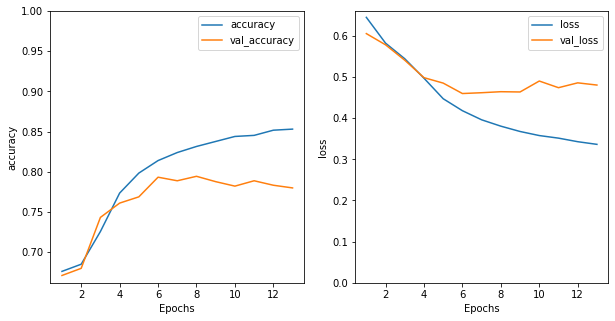

In [ ]:
# epochs가 13회가 아닌 다른 결과(예:15회)로 나오면 아래 줄 13을 해당 숫자인 15로 바꿔주야 함에 유의
epochs = range(1,13+1) # epochs가 13까지만 수행된 것을 반영

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수들을 불러오기
model.load_weights('RNNClassifier.tf')

In [ ]:
# LSTM RNN 모델 평가
test_loss, test_acc = model.evaluate(test_dataset)

print("test loss: ", test_loss)
print()
print("test accuracy: ", test_acc)

50/50 [==============================] - 1s 18ms/step - loss: 0.4759 - accuracy: 0.7807
test loss:  0.4759272336959839

test accuracy:  0.7806666493415833


In [ ]:
# 샘플 텍스트에 담긴 감정을 예측(predict)
sample_text = ('Good news/Bad news! Good news: I just got vaccinated!'
               'Bad news: I got it because I’m 75. Ha! The operation in NYC was smooth as silk')
predictions = model.predict(np.array([sample_text]))
predictions

array([[0.85883874]], dtype=float32)

In [ ]:
sample_text = ('I just left ER. We are officially backed to getting crushed by Covid 19 Delta variant.')
predictions = model.predict(np.array([sample_text]))
predictions

array([[0.08013311]], dtype=float32)